In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
df = pd.read_csv('train.txt', sep=';',names = ['Message','Emotion'])
df

FileNotFoundError: [Errno 2] No such file or directory: 'train.txt'

In [21]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
df.describe()

,Message,Emotion
count,16000,16000
unique,15969,6
top,i feel on the verge of tears from weariness i ...,joy
freq,2,5362


In [68]:
df.groupby('Emotion').describe()

Message                                                            \
           count unique                                                top   
Emotion                                                                      
anger       2159   2159   im grabbing a minute to post i feel greedy wrong   
fear        1937   1937  i feel as confused about life as a teenager or...   
joy         5362   5361  i feel more adventurous willing to take risks ...   
love        1304   1304  i am ever feeling nostalgic about the fireplac...   
sadness     4666   4666                            i didnt feel humiliated   
surprise     572    572  ive been taking or milligrams or times recomme...   

               
         freq  
Emotion        
anger       1  
fear        1  
joy         2  
love        1  
sadness     1  
surprise    1

In [69]:
df['Length'] = df['Message'].apply(len)
df

,Message,Emotion,Length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


<AxesSubplot:xlabel='Length', ylabel='Count'>

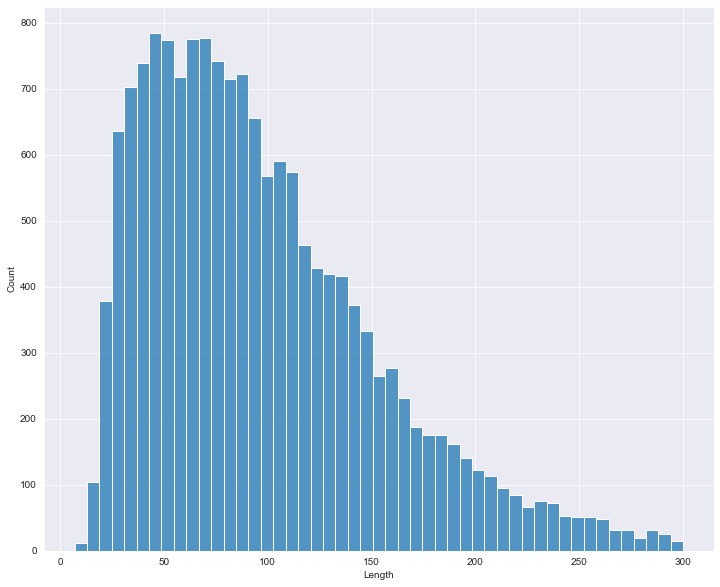

In [70]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.histplot(df['Length'])

In [71]:
df['Length'].max()

300

In [72]:
df['Length'].min()

7

In [73]:
df[df['Length'] == df['Length'].max()]

,Message,Emotion,Length
10390,i hope that those of you who actauly found thi...,joy,300


In [74]:
df[df['Length'] == df['Length'].min()]

,Message,Emotion,Length
12801,one day,sadness,7


<AxesSubplot:xlabel='Emotion', ylabel='Count'>

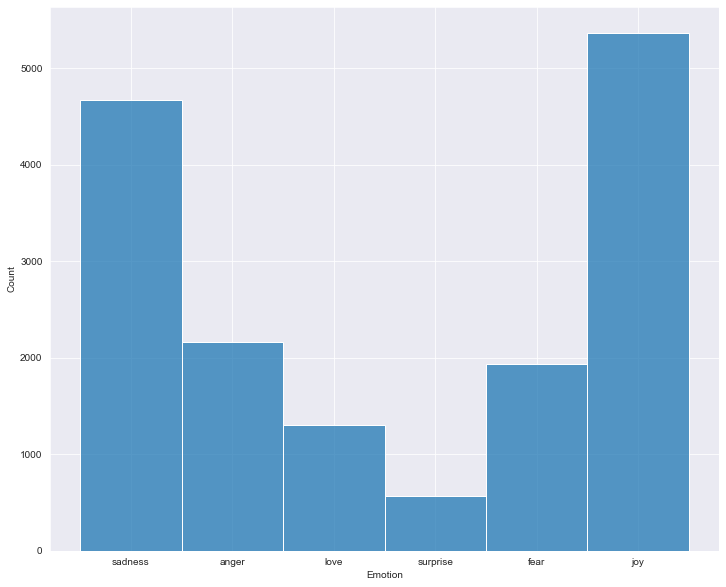

In [75]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.histplot(df['Emotion'])

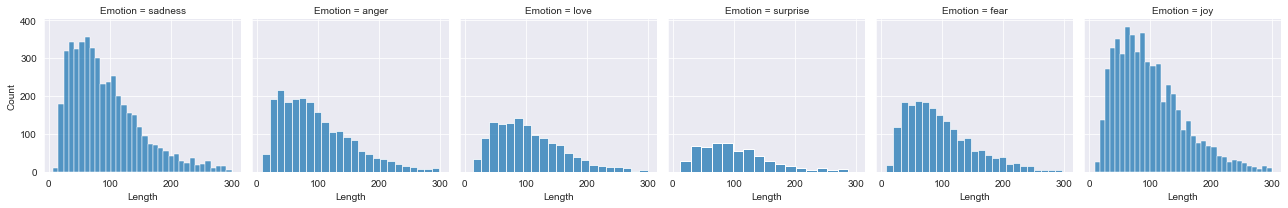

In [76]:
g = sns.FacetGrid(df, col='Emotion')
g.map_dataframe(sns.histplot, x='Length')

<AxesSubplot:ylabel='Count'>

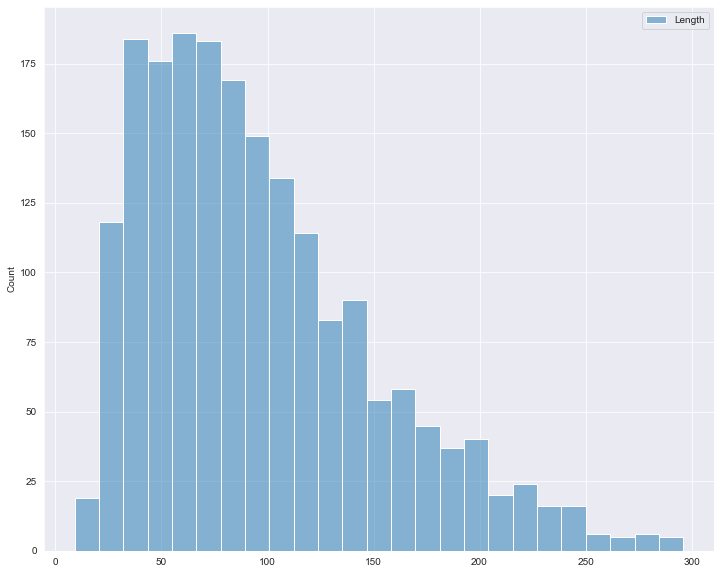

In [77]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.histplot(df[df['Emotion'] == 'fear']) 

In [13]:
b = sns.countplot(x = 'Emotion', data=df)
b

NameError: name 'df' is not defined

In [9]:
x=df['Message']
y=df['Emotion']

NameError: name 'df' is not defined

# COUNTVECTORIZER

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
CountVectorizer()

CountVectorizer()

In [7]:
cv = CountVectorizer()

In [10]:
react = cv.fit_transform(x)
react

NameError: name 'x' is not defined

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

# MULTINOMIAL

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [87]:
model = MultinomialNB().fit(react,df['Emotion'])

In [88]:
m = model.predict(react)
m

array(['sadness', 'sadness', 'anger', ..., 'joy', 'joy', 'sadness'],
      dtype='<U8')

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(df['Emotion'], m))

              precision    recall  f1-score   support

       anger       0.97      0.84      0.90      2159
        fear       0.94      0.78      0.85      1937
         joy       0.84      0.98      0.91      5362
        love       0.99      0.54      0.70      1304
     sadness       0.85      0.99      0.91      4666
    surprise       0.97      0.20      0.33       572

    accuracy                           0.88     16000
   macro avg       0.93      0.72      0.77     16000
weighted avg       0.89      0.88      0.86     16000



# KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
knn = KNeighborsClassifier(7)

In [123]:
new_model = knn.fit(react, df['Emotion'])

In [124]:
new_model

KNeighborsClassifier(n_neighbors=7)

In [125]:
react = cv.transform(x)
react

<16000x15186 sparse matrix of type '<class 'numpy.int64'>'
	with 249634 stored elements in Compressed Sparse Row format>

In [126]:
m = new_model.predict(react)
m

array(['sadness', 'sadness', 'anger', ..., 'joy', 'anger', 'sadness'],
      dtype=object)

In [127]:
predictions = knn.predict(react)

In [128]:
from sklearn.metrics import classification_report

In [129]:
print(classification_report(df['Emotion'],predictions))

              precision    recall  f1-score   support

       anger       0.50      0.54      0.52      2159
        fear       0.57      0.42      0.48      1937
         joy       0.60      0.74      0.66      5362
        love       0.65      0.20      0.31      1304
     sadness       0.62      0.68      0.65      4666
    surprise       0.77      0.13      0.22       572

    accuracy                           0.59     16000
   macro avg       0.62      0.45      0.47     16000
weighted avg       0.60      0.59      0.57     16000



# SVM

In [3]:
from sklearn.svm import SVC

In [4]:
svc = SVC()

In [102]:
svc_model = svc.fit(react, df['Emotion'])

In [103]:
svc_model

SVC()

In [104]:
predictions = svc.predict(react)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
confusion_matrix(df['Emotion'],predictions)

array([[2043,    6,   38,    0,   72,    0],
       [  24, 1840,   29,    0,   44,    0],
       [   7,    7, 5333,    5,    9,    1],
       [   2,    0,  191, 1105,    5,    1],
       [  16,   17,   13,    6, 4613,    1],
       [   0,   91,   36,    0,    4,  441]], dtype=int64)

In [107]:
print(classification_report(df['Emotion'],predictions))

              precision    recall  f1-score   support

       anger       0.98      0.95      0.96      2159
        fear       0.94      0.95      0.94      1937
         joy       0.95      0.99      0.97      5362
        love       0.99      0.85      0.91      1304
     sadness       0.97      0.99      0.98      4666
    surprise       0.99      0.77      0.87       572

    accuracy                           0.96     16000
   macro avg       0.97      0.92      0.94     16000
weighted avg       0.96      0.96      0.96     16000



# GRID PREDICTION

In [108]:
param_grid = {'C':[0.1,1,10,100,1000],    #how much error allowed
             'gamma':[1,0.1,0.001,0.0001],#how much overfitting allowed
             'kernel':['rbf']}

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=3)

In [111]:
grid.fit(react,df['Emotion'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.335 total time=  53.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.335 total time=  53.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.335 total time=  56.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.335 total time=  55.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.335 total time=  60.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.388 total time=  49.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.377 total time=  49.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.385 total time=  49.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.385 total time=  49.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.386 total time=  48.5s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.335 total time=  39.3s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [112]:
gridPredictions = grid.predict(react)

In [113]:
print(classification_report(df['Emotion'],gridPredictions))

              precision    recall  f1-score   support

       anger       0.96      0.96      0.96      2159
        fear       0.94      0.97      0.95      1937
         joy       0.97      0.98      0.97      5362
        love       0.96      0.94      0.95      1304
     sadness       0.98      0.97      0.97      4666
    surprise       0.96      0.90      0.93       572

    accuracy                           0.97     16000
   macro avg       0.96      0.95      0.96     16000
weighted avg       0.97      0.97      0.97     16000



# PIPELINE

In [1]:
from sklearn.pipeline import Pipeline

In [2]:
pipeline = Pipeline([
    ('cvc', CountVectorizer()),
    ('classifier',SVC(C= 1000, gamma = 0.001, kernel= 'rbf'))
])

NameError: name 'CountVectorizer' is not defined

In [116]:
pipeline.fit(df['Message'],df['Emotion'])

Pipeline(steps=[('cvc', CountVectorizer()),
                ('classifier', SVC(C=1000, gamma=0.001))])

In [117]:
pp = pipeline.predict(['i feel like i have to make the suffering i m seeing mean something'])

# PICKLE

In [118]:
import pickle

In [119]:
pickle.dump(knn, open("model.pkl", "wb"))

NameError: name 'knn' is not defined

In [120]:
X.columns

NameError: name 'X' is not defined

In [ ]:
saved_model.predict([[]])

In [ ]:
prediction_proba = saved_model.predict_proba([[]])
prediction_proba

In [ ]:
np.round(prediction_proba.max() * 100, 2)